<a href="https://colab.research.google.com/github/rajibrj43/Data-Science/blob/main/FS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [6]:
df_fs = pd.read_csv('/content/MIS 444/fs.csv')

In [7]:
df_fs.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,0.072991,-0.554487,-0.211241,0.273231,0.411733,2,1
1,LP001003,1,1,1,0,0,-0.134412,-0.038732,-0.211241,0.273231,0.411733,0,0
2,LP001005,1,1,0,0,1,-0.393747,-0.554487,-0.948996,0.273231,0.411733,2,1
3,LP001006,1,1,0,1,0,-0.462062,0.251980,-0.306435,0.273231,0.411733,2,1
4,LP001008,1,0,0,0,0,0.097728,-0.554487,-0.056551,0.273231,0.411733,2,1


In [8]:
# Remove non-numeric columns like 'Loan_ID' and reapply the feature selection
df_fs = df_fs.drop(columns=['Loan_ID'])

In [9]:
# Separate features (X) and target (y)
X_fs = df_fs.drop('Loan_Status', axis=1)
y_fs = df_fs['Loan_Status']

In [10]:
# Check and handle missing values if any (fill them with median for numerical columns)
X_fs.fillna(X_fs.median(), inplace=True)

In [11]:
from sklearn.datasets import load_digits
from sklearn.feature_selection import SelectKBest, chi2

# Convert any negative values in the dataset to 0
X_fs[X_fs < 0] = 0

# Apply Chi-Square Test for feature selection
chi2_selector_fs = SelectKBest(chi2, k='all')  # Evaluate all features
X_new_fs = chi2_selector_fs.fit_transform(X_fs, y_fs)

In [12]:
# Get the chi-squared values for each feature
chi2_values_fs = chi2_selector_fs.scores_

In [13]:
# Create a DataFrame to display the feature selection results
feature_scores_fs = pd.DataFrame({'Feature': X_fs.columns, 'Chi-Square Score': chi2_values_fs})
feature_scores_fs.sort_values(by='Chi-Square Score', ascending=False, inplace=True)

In [14]:
feature_scores_fs.head()

,Feature,Chi-Square Score
6,CoapplicantIncome,12.130312
9,Credit_History,10.707470
3,Education,3.540502
1,Married,1.782425
8,Loan_Amount_Term,1.574556


In [16]:
df_fs = pd.read_csv('/content/MIS 444/fs.csv')
# Remove non-numeric columns like 'Loan_ID' and reapply the feature selection
df_fs = df_fs.drop(columns=['Loan_ID'])

In [17]:
# Calculate the correlation matrix for the dataset
correlation_matrix = df_fs.corr()

In [18]:
# Display the correlation matrix
correlation_matrix

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.364569,0.172914,0.045364,-0.000525,0.058809,0.082912,0.106904,-0.074030,0.009170,-0.025752,0.017987
Married,0.364569,1.000000,0.334216,0.012304,0.004489,0.051708,0.075948,0.146546,-0.100912,0.010938,0.004257,0.091478
Dependents,0.172914,0.334216,1.000000,0.055752,0.056798,0.118202,0.030430,0.163103,-0.103864,-0.040160,-0.000244,0.010118
Education,0.045364,0.012304,0.055752,1.000000,-0.010383,-0.140760,-0.062290,-0.168759,-0.073928,-0.073658,-0.065243,-0.085884
Self_Employed,-0.000525,0.004489,0.056798,-0.010383,1.000000,0.127180,-0.016100,0.115100,-0.033739,-0.001550,-0.030860,-0.003700
ApplicantIncome,0.058809,0.051708,0.118202,-0.140760,0.127180,1.000000,-0.116605,0.565181,-0.046531,-0.018615,-0.009500,-0.004710
CoapplicantIncome,0.082912,0.075948,0.030430,-0.062290,-0.016100,-0.116605,1.000000,0.189218,-0.059383,0.011134,0.010522,-0.059187
LoanAmount,0.106904,0.146546,0.163103,-0.168759,0.115100,0.565181,0.189218,1.000000,0.036960,-0.000607,-0.046632,-0.033214
Loan_Amount_Term,-0.074030,-0.100912,-0.103864,-0.073928,-0.033739,-0.046531,-0.059383,0.036960,1.000000,-0.004705,-0.076120,-0.022549
Credit_History,0.009170,0.010938,-0.040160,-0.073658,-0.001550,-0.018615,0.011134,-0.000607,-0.004705,1.000000,0.001963,0.540556


In [21]:
# Separate features (X) and target (y)
X_FS = df_fs.drop('Loan_Status', axis=1)
y_FS = df_fs['Loan_Status']

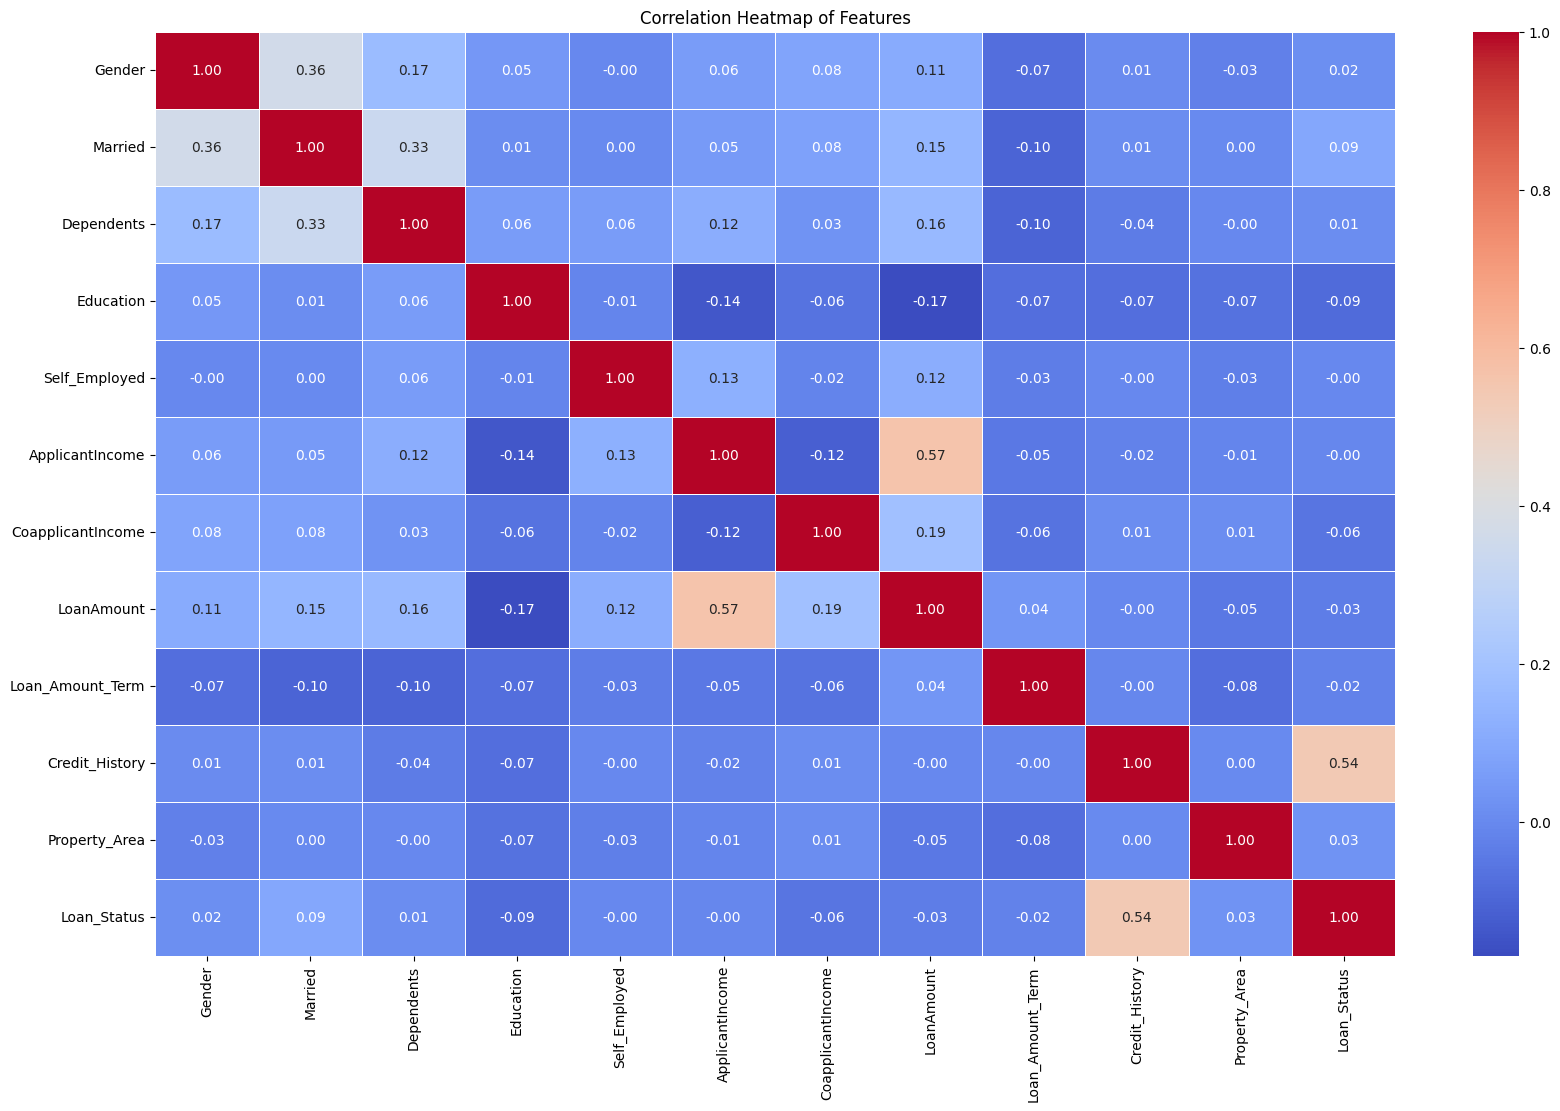

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap of the correlation matrix
plt.figure(figsize=(20, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Display the heatmap
plt.title('Correlation Heatmap of Features')
plt.show()

In [23]:
# Set a threshold for correlation
threshold = 0.8

# Find highly correlated features
highly_correlated_features = []

# Iterate through the correlation matrix and find pairs of features with correlation greater than the threshold
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            feature_pair = (correlation_matrix.columns[i], correlation_matrix.columns[j])
            highly_correlated_features.append(feature_pair)

# Display the pairs of highly correlated features
highly_correlated_features


[]

In [24]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Initialize a Logistic Regression model (can be replaced with any other model)
model = LogisticRegression(max_iter=1000)

# Apply Recursive Feature Elimination (RFE)
rfe_selector = RFE(model, n_features_to_select=5)  # We will select the top 5 features
X_rfe = rfe_selector.fit_transform(X_FS, y_FS)

# Get the selected features
selected_features_rfe = X_FS.columns[rfe_selector.support_]

# Display the selected features
selected_features_rfe


Index(['Married', 'Education', 'CoapplicantIncome', 'LoanAmount',
       'Credit_History'],
      dtype='object')

In [25]:
import statsmodels.api as sm

# Add constant term to the features (required for statsmodels)
X_fs_const = sm.add_constant(X_FS)

# Initialize a list to store the selected features
selected_features_fs = []

# Define a function for forward selection
def forward_selection(X, y):
    remaining_features = X.columns.tolist()
    selected_features = []
    while remaining_features:
        best_pval = float('inf')
        best_feature = None

        # Loop through the remaining features and calculate the p-value for each
        for feature in remaining_features:
            X_temp = X[selected_features + [feature]]
            model = sm.Logit(y, X_temp)
            result = model.fit(disp=0)
            pval = result.pvalues[feature]
            if pval < best_pval:
                best_pval = pval
                best_feature = feature

        # If the best p-value is below a significance level (e.g., 0.05), add it to the selected features
        if best_pval < 0.05:
            selected_features.append(best_feature)
            remaining_features.remove(best_feature)
        else:
            break
    return selected_features

# Perform forward selection
selected_features_fs = forward_selection(X_fs_const, y_FS)

# Display the selected features
selected_features_fs


['Credit_History', 'const', 'Married']

In [26]:
# Define a function for backward elimination
def backward_elimination(X, y):
    remaining_features = X.columns.tolist()
    while len(remaining_features) > 0:
        X_temp = X[remaining_features]
        model = sm.Logit(y, X_temp)
        result = model.fit(disp=0)

        # Get p-values for all features
        pvalues = result.pvalues
        max_pval = pvalues.max()

        # If the max p-value is above a threshold (e.g., 0.05), remove the feature with the highest p-value
        if max_pval > 0.05:
            feature_to_remove = pvalues.idxmax()
            remaining_features.remove(feature_to_remove)
        else:
            break
    return remaining_features

# Perform backward elimination
selected_features_be = backward_elimination(X_fs_const, y_FS)

# Display the selected features
selected_features_be


['const', 'Married', 'Credit_History']

In [27]:
from sklearn.linear_model import LassoCV

# Initialize the LassoCV model with cross-validation to select the best alpha
lasso = LassoCV(cv=5)

# Fit the Lasso model
lasso.fit(X_FS, y_FS)

# Get the coefficients of the features
lasso_coefficients = lasso.coef_

# Identify the features that have non-zero coefficients
selected_features_lasso = X_FS.columns[lasso_coefficients != 0]

# Display the selected features
selected_features_lasso


Index(['CoapplicantIncome', 'Credit_History'], dtype='object')

In [28]:
from sklearn.ensemble import RandomForestClassifier

# Initialize a Random Forest Classifier model
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model to the data
rf.fit(X_FS, y_FS)

# Get the feature importances
feature_importances = rf.feature_importances_

# Create a DataFrame to display the feature importances
feature_importance_df = pd.DataFrame({'Feature': X_fs.columns, 'Importance': feature_importances})

# Sort the features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

feature_importance_df.head()


,Feature,Importance
9,Credit_History,0.267169
5,ApplicantIncome,0.211483
7,LoanAmount,0.184033
6,CoapplicantIncome,0.118609
10,Property_Area,0.047058
